# Some installation

In [57]:
!pip install pmdarima
!pip install chart_studio
!pip install pyramid-arima

# Some import and configuration

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from datetime import datetime
import chart_studio
import chart_studio.plotly as ply
import cufflinks as cf
import plotly.graph_objects as go

In [0]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
# go to and get api_key you need to sign-up : https://chart-studio.plot.ly/settings/api#/
chart_studio.tools.set_credentials_file(username='tking031', api_key='1D7itLSDevid5LdlhIYv')

In [0]:
def str_to_class(str):
    return getattr(sys.modules[__name__], str)

# Total deaths, confirmed cases in the world

In [0]:
url_tot = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
url_deat= "https://covid.ourworldindata.org/data/ecdc/total_deaths.csv"
data_tot = pd.read_csv(url_tot,index_col=0)
data_death = pd.read_csv(url_deat,index_col=0)

In [0]:
x=[i for i in data_death.columns]

## Read any country data

In [0]:
country='China' #@param ["World","Afghanistan","Albania","Algeria","Andorra","Angola","Antigua and Barbuda","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahamas","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Benin","Bermuda","Bhutan","Bolivia","Bosnia and Herzegovina","Brazil","Brunei","Bulgaria","Burkina Faso","Cambodia","Cameroon","Canada","Cape Verde","Cayman Islands","Central African Republic","Chad","Chile","China","Colombia","Congo","Costa Rica","Cote d'Ivoire","Croatia","Cuba","Cyprus","Czech Republic","Democratic Republic of Congo","Denmark","Djibouti","Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea","Estonia","Ethiopia","Faeroe Islands","Fiji","Finland","France","French Polynesia","Gabon","Gambia","Georgia","Germany","Ghana","Gibraltar","Greece","Greenland","Guam","Guatemala","Guernsey","Guinea","Guyana","Haiti","Honduras","Hungary","Iceland","India","Indonesia","International","Iran","Iraq","Ireland","Isle of Man","Israel","Italy","Jamaica","Japan","Jersey","Jordan","Kazakhstan","Kenya","Kosovo","Kuwait","Kyrgyzstan","Latvia","Lebanon","Liberia","Liechtenstein","Lithuania","Luxembourg","Macedonia","Madagascar","Malaysia","Maldives","Malta","Mauritania","Mauritius","Mexico","Moldova","Monaco","Mongolia","Montenegro","Montserrat","Morocco","Myanmar","Namibia","Nepal","Netherlands","Netherlands Antilles","New Caledonia","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Palestine","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal","Qatar","Romania","Russia","Rwanda","Saint Lucia","Saint Vincent and the Grenadines","San Marino","Saudi Arabia","Senegal","Serbia","Seychelles","Singapore","Slovakia","Slovenia","Somalia","South Africa","South Korea","Spain","Sri Lanka","Sudan","Suriname","Swaziland","Sweden","Switzerland","Taiwan","Tanzania","Thailand","Timor","Togo","Trinidad and Tobago","Tunisia","Turkey","Uganda","Ukraine","United Arab Emirates","United Kingdom","United States","Uruguay","Uzbekistan","Vatican","Venezuela","Vietnam","Zambia","Zimbabwe"]

## Some statistic information

In [0]:
Which_data = 'Total' #@param ["Total","Deaths"]
if(Which_data=="Total"):
  working_data=data_tot
  test_caption="Total case"
else :
  working_data=data_death
  test_caption="Death case"

In [232]:
working_data[country].describe()

count       84.000000
mean     41610.321429
std      36263.757148
min         27.000000
25%        348.250000
50%      41451.000000
75%      80165.750000
max      81649.000000
Name: China, dtype: float64

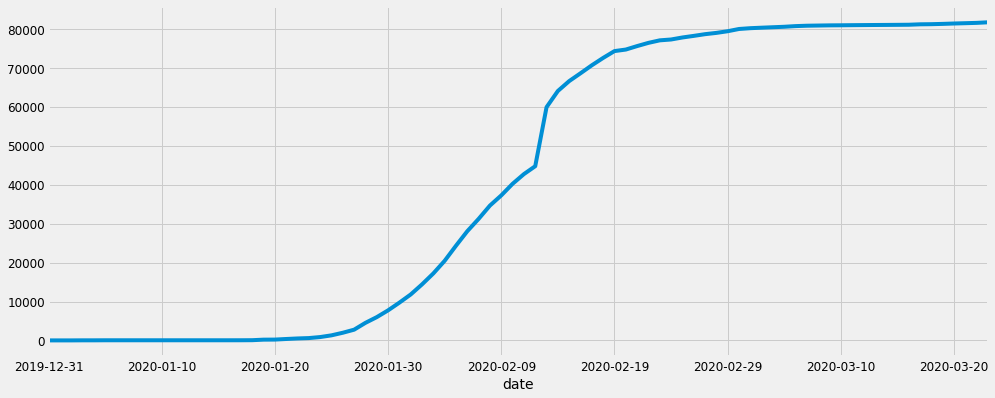

In [233]:
working_data[country].plot(figsize=(15, 6))
plt.show()

In [234]:
working_data[country].iplot(title="Covid-19 "+ country)

## Preparing the data

In [0]:
#divide into train and validation set
ratio = 90 #@param {type:"slider", min:0,max:100,  step:5}
train = working_data[country][:int((ratio/100)*(len(working_data[country])))]
valid = working_data[country][int((ratio/100)*(len(working_data[country]))):]



## **1.   Arimax**




In [238]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [0]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1 ,0,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)  

In [241]:
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9549      0.158      6.052      0.000       0.646       1.264
ma.L1         -0.6658      0.211     -3.160      0.002      -1.079      -0.253
ar.S.L12      -0.0032    160.848  -2.01e-05      1.000    -315.260     315.254
ma.S.L12      -0.0034    161.099   -2.1e-05      1.000    -315.752     315.745
sigma2      3.007e+06   3.02e+05      9.956      0.000    2.42e+06     3.6e+06


## Prediction of train datasets

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2019-12-31'), dynamic=False)
pred_ci = pred.conf_int()

In [260]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=working_data[country].index, y=working_data[country].values,
                    mode='lines',
                    name=test_caption))
fig.add_trace(go.Scatter(x=pred.predicted_mean.index, y=pred.predicted_mean.values.astype(int),
                    mode='lines',
                    name='Predictions'))
fig.show()

## Prediction of validation datasets

In [0]:
pred_uc = results.get_forecast(len(valid))
pred_ci = pred_uc.conf_int()

In [262]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=working_data[country].index, y=working_data[country].values,
                    mode='lines',
                    name=test_caption))
fig.add_trace(go.Scatter(x=pred_uc.predicted_mean.index, y=pred_uc.predicted_mean.values.astype(int),
                    mode='lines',
                    name='Predictions'))
fig.show()

##Predition of the next 15 days

In [0]:
pred_uc = results.get_forecast(len(valid)+(15-len(valid)))
pred_ci = pred_uc.conf_int()

In [264]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=working_data[country].index, y=working_data[country].values,
                    mode='lines',
                    name=test_caption))
fig.add_trace(go.Scatter(x=pred_uc.predicted_mean.index, y=pred_uc.predicted_mean.values.astype(int),
                    mode='lines',
                    name='Predictions'))
fig.show()

## **2.   Autoarima**




## Start training

In [252]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1,trace=True, error_action='ignore', suppress_warnings=True,stepwise=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1122.598, BIC=1133.233, Time=1.480 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1169.726, BIC=1173.980, Time=0.018 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=1148.527, BIC=1157.035, Time=0.449 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1137.264, BIC=1145.773, Time=1.226 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=1167.747, BIC=1169.875, Time=0.028 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=1155.984, BIC=1164.492, Time=0.251 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=1129.290, BIC=1142.052, Time=1.951 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse r

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

## Prediction of the validation datatsets

In [0]:
forecast = model.predict(len(valid))

In [265]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=working_data[country].index, y=working_data[country].values,
                    mode='lines',
                    name=test_caption))
fig.add_trace(go.Scatter(x=valid.index, y=forecast.astype(int),
                    mode='lines',
                    name='Predictions'))
fig.show()

## Prediction of the next 15 days

In [0]:
date_input = '2020-03-23' #@param {type:"date"}
test = pd.date_range(datetime.strptime(date_input, '%Y-%m-%d').date(), periods=25).tolist()

In [0]:
for i in range(0,len(test)):
  test[i] = datetime.strptime(str(test[i]), '%Y-%m-%d %H:%M:%S').date()

In [0]:
forecast = model.predict(len(test))

In [282]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=working_data[country].index, y=working_data[country].values,
                    mode='lines',
                    name=test_caption))
fig.add_trace(go.Scatter(x=test, y=forecast.astype(int),
                    mode='lines',
                    name='Predictions'))
fig.show()

# Read Algeria Data

In [283]:
df = pd.read_csv("https://github.com/belarbi2733/docker_file__opencv_algo/releases/download/1/Classeur1.csv",index_col=0)
df.head()

,confirmed,recovered,deaths
25-02-2020,1,0,0
26-02-2020,1,0,0
27-02-2020,1,0,0
28-02-2020,1,0,0
29-02-2020,1,0,0


In [284]:
df.describe()

,confirmed,recovered,deaths
count,28.000000,28.000000,28.000000
mean,38.678571,11.964286,3.178571
std,44.705666,20.256653,5.062963
min,1.000000,0.000000,0.000000
25%,4.500000,0.000000,0.000000
50%,20.000000,0.000000,0.000000
75%,55.500000,12.000000,4.000000
max,139.000000,65.000000,15.000000


In [0]:
index = df.index
columns = df.columns
values = df.values

In [0]:
for i in range(len(df.index)):
  df.index.values[i] = datetime.strptime(df.index[i], '%d-%m-%Y').date()


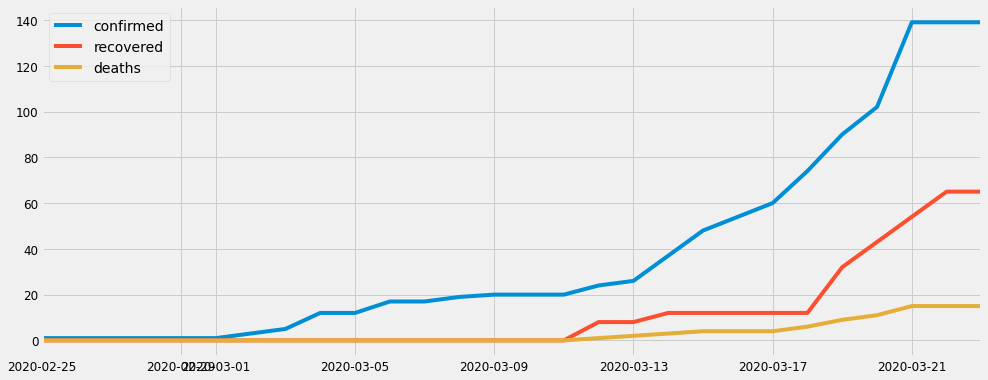

In [287]:
df.plot(figsize=(15, 6))
plt.show()

In [316]:
df.iplot(title="Covid-19 Algeria")

In [0]:
df1=df

In [0]:
#divide into train and validation set
ratio = 95 #@param {type:"slider", min:0,max:100,  step:5}
train = df1[:int((ratio/100)*(len(df1)))]
valid = df1[int((ratio/100)*(len(df1))):]

In [300]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [0]:
cases='confirmed' #@param ["deaths","recovered","confirmed"]

In [0]:
mod = sm.tsa.statespace.SARIMAX(train[cases],
                                order=(1, 1, 1),
                                seasonal_order=(1 ,0,0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)                              


In [312]:
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2868      0.059     21.719      0.000       1.171       1.403
ma.L1         -1.0000      0.452     -2.214      0.027      -1.885      -0.115
ar.S.L12   -5.129e-07      0.795  -6.45e-07      1.000      -1.558       1.558
sigma2        30.7042      0.015   2087.516      0.000      30.675      30.733


In [0]:
date_input = '2020-02-25' #@param {type:"date"}
pred = results.get_prediction(start=pd.to_datetime(date_input), dynamic=False)
pred_ci = pred.conf_int()

In [318]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train[cases].index, y=train[cases].values,
                    mode='lines',
                    name=cases))
fig.add_trace(go.Scatter(x=pred.predicted_mean.index, y=pred.predicted_mean.values.astype(int),
                    mode='lines',
                    name='Predictions'))
fig.show()


In [320]:
pred_uc = results.get_forecast(steps=len(valid)+(15-len(valid)))
pred_ci = pred_uc.conf_int()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df1[cases].index, y=df1[cases].values,
                    mode='lines',
                    name=cases))
fig.add_trace(go.Scatter(x=pred_uc.predicted_mean.index, y=pred_uc.predicted_mean.values.astype(int),
                    mode='lines',
                    name='Predictions'))
fig.show()


In [321]:
predictions=pred_uc.predicted_mean
predictions.astype(int)

2020-03-22     175
2020-03-23     221
2020-03-24     281
2020-03-25     357
2020-03-26     456
2020-03-27     584
2020-03-28     747
2020-03-29     958
2020-03-30    1229
2020-03-31    1578
2020-04-01    2026
2020-04-02    2604
2020-04-03    3347
2020-04-04    4303
2020-04-05    5533
Freq: D, dtype: int64